In [1]:
#Using pdb structures from github sandro bottaro tetranucleotides

In [2]:
#!!!!!!!!!!!!!!!!!!!Rewrite the posres file to use 1000 as spring const when doing everything from scratch !!!!!!!!!!!!!

In [1]:
import os
os.getcwd()

'/u/t/tfrahlki/Documents/Projects/DihedralCorrections/Simulations/Project_ff_learning/GACC_TREMD'

In [2]:
Sequence='GACC'

In [5]:
#Optional Preprocessing
#VMD plugin AutoPSF --> automatically delete terminal phosphate group and rename hydrogen
#manually change the residue name into C A G U

In [6]:
#%%bash -s $Sequence
#vi StartingStructures/$1/$1.pdb -c '%s/CYT/C  ' -c '%s/GUA/G  ' -c '%s/ADE/A  ' -c '%s/URA/U  ' -c "%s/H2''/HO'2" -c 'wq' 

In [7]:
#generate topol.top and Sequence_processed.gro

In [8]:
%%bash -s $Sequence
gmx_mpi pdb2gmx -f ../StartingStructures/$1/$1.pdb -o ${1}.gro<<EOF
1
6
EOF


Select the Force Field:
From current directory:
 1: AMBER99SB_NA amber99sb*-ildn + parmbsc0 + chiOL + MG_villa + ions_cheatam
From '/u/b/bussi/software/gromacs-2018.5/share/gromacs/top':
 2: AMBER03 protein, nucleic AMBER94 (Duan et al., J. Comp. Chem. 24, 1999-2012, 2003)
 3: AMBER94 force field (Cornell et al., JACS 117, 5179-5197, 1995)
 4: AMBER96 protein, nucleic AMBER94 (Kollman et al., Acc. Chem. Res. 29, 461-469, 1996)
 5: AMBER99 protein, nucleic AMBER94 (Wang et al., J. Comp. Chem. 21, 1049-1074, 2000)
 6: AMBER99SB protein, nucleic AMBER94 (Hornak et al., Proteins 65, 712-725, 2006)
 7: AMBER99SB-ILDN protein, nucleic AMBER94 (Lindorff-Larsen et al., Proteins 78, 1950-58, 2010)
 8: AMBERGS force field (Garcia & Sanbonmatsu, PNAS 99, 2782-2787, 2002)
 9: CHARMM27 all-atom force field (CHARM22 plus CMAP for proteins)
10: GROMOS96 43a1 force field
11: GROMOS96 43a2 force field (improved alkane dihedrals)
12: GROMOS96 45a3 force field (Schuler JCC 2001 22 1205)
13: GROMOS96 53a

                     :-) GROMACS - gmx pdb2gmx, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [9]:
#Energy minimization

In [10]:
%%bash -s $Sequence
cat > min1.mdp << EOF
; LINES STARTING WITH ';' ARE COMMENTS
title           = Minimization $1

; The following lines tell the program the standard locations where to find certain files
cpp             = /lib/cpp      ; Preprocessor

; Define can be used to control processes (POSITION RESTRAINTS)
define          = -DPOSRES -DPOSRES_WATER

; Parameters describing what to do, when to stop and what to save
integrator      = steep         ; Algorithm (steep = steepest descent minimization)
;emtol           = 1.0           ; Stop minimization when the maximum force < 1.0 kJ mol-1 nm-1
dt              = 0.002         ; Time step
nsteps          = 2000          ; Maximum number of (minimization) steps to perform
nstlog          = 40
nstenergy       = 40            ; Write energies to disk every nstenergy steps
nstxtcout       = 40            ; Write coordinates to disk every nstxtcout steps
nstvout         = 40            ; Write velocities to disk every nstvout steps
xtc_grps        = System        ; Which coordinate group(s) to write to disk
energygrps      = System        ; Which energy group(s) to write to disk

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist         = 5             ; Frequency to update the neighbor list and long range forces
ns_type         = grid          ; Method to determine neighbor list (simple, grid)
rlist           = 0.5           ; Cut-off for making neighbor list (short range forces)
coulombtype     = cut-off       ; Treatment of long range electrostatic interactions
rcoulomb        = 0.5           ; long range electrostatic cut-off
rvdw            = 0.5           ; long range Van der Waals cut-off
constraints     = none          ; Bond types to replace by constraints
pbc             = no            ; Periodic Boundary Conditions (yes/no)
cutoff-scheme   = Group
EOF


In [11]:
%%bash -s $Sequence
gmx_mpi grompp -f min1.mdp -c ${1}.gro -p topol.top -o min1.tpr -r ${1}.gro

Analysing residue names:
There are:     4        RNA residues
This run will generate roughly 0 Mb of data


                      :-) GROMACS - gmx grompp, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [12]:
%%bash -s $Sequence
gmx_mpi mdrun -v -s min1.tpr -o min1.trr -c $1_min1.gro -e min1.edr

                      :-) GROMACS - gmx mdrun, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS dev

In [13]:
#Adding water

In [14]:
%%bash -s $Sequence
gmx_mpi editconf -f ${1}.gro -o ${1}_newbox.gro -c -d 1.5 -bt dodecahedron 
mv topol.top ${1}.top

Read 128 atoms
Volume: 2.59207 nm^3, corresponds to roughly 1100 electrons
No velocities found
    system size :  0.983  1.847  1.428 (nm)
    diameter    :  2.103               (nm)
    center      :  0.618  0.082  0.650 (nm)
    box vectors :  0.983  1.847  1.428 (nm)
    box angles  :  90.00  90.00  90.00 (degrees)
    box volume  :   2.59               (nm^3)
    shift       :  3.209  3.745  1.154 (nm)
new center      :  3.827  3.827  1.804 (nm)
new box vectors :  5.103  5.103  5.103 (nm)
new box angles  :  60.00  60.00  90.00 (degrees)
new box volume  :  93.94               (nm^3)


                     :-) GROMACS - gmx editconf, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS d

In [15]:
%%bash -s $Sequence
gmx_mpi solvate -cp ${1}_newbox.gro -cs opc.gro -o ${1}_solv.gro -p ${1}.top


         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary.

NOTE: From version 5.0 gmx solvate uses the Van der Waals radii
from the source below. This means the results may be different
compared to previous GROMACS versions.

++++ PLEASE READ AND CITE THE FOLLOWING REFERENCE ++++
A. Bondi
van der Waals Volumes and Radii
J. Phys. Chem. 68 (1964) pp. 441-451
-------- -------- --- Thank You --- -------- --------

Adding line for 3072 solvent molecules with resname (SOL) to topology file (GACC.top)


                     :-) GROMACS - gmx solvate, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [16]:
%%bash -s $Sequence
cat > min2.mdp << EOF
; LINES STARTING WITH ';' ARE COMMENTS
title           = Minimization $1    ; Title of run

; The following lines tell the program the standard locations where to find certain files
cpp             = /lib/cpp      ; Preprocessor
;include        = -I../top      ; Directories to include in the topology format

; Define can be used to control processes (POSITION RESTRAINTS)
define          = -DPOSRES -DPOSRES_WATER

; Parameters describing what to do, when to stop and what to save
integrator      = steep         ; Algorithm (steep = steepest descent minimization)
;emtol           = 1.0           ; Stop minimization when the maximum force < 1.0 kJ mol-1 nm-1
nsteps          = 50000         ; Maximum number of (minimization) steps to perform
nstenergy       = 50            ; Write energies to disk every nstenergy steps
nstxtcout       = 50            ; Write coordinates to disk every nstxtcout steps
nstvout         = 50
nstlog          = 50
xtc_grps        = System        ; Which coordinate group(s) to write to disk
energygrps      = System        ; Which energy group(s) to write to disk

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions

cutoff-scheme=Verlet
nstlist         = 5             ; Frequency to update the neighbor list and long range forces
ns_type         = grid          ; Method to determine neighbor list (simple, grid)
constraints     = none          ; Bond types to replace by constraints
;treatment of electrostatic interactions
coulombtype = PME 
;treatment of van der waals interactions
rvdw = 1.0 
rlist = 1.0 
rcoulomb = 1.0 
;fourierspacing = 0.12 
; Periodic boudary conditions in all the directions 
pbc                      = xyz
EOF


In [17]:
%%bash -s $Sequence
gmx_mpi grompp -f min2.mdp -c ${1}_solv.gro -p ${1}.top -o min2.tpr -r ${1}_solv.gro -maxwarn 1


++++ PLEASE READ AND CITE THE FOLLOWING REFERENCE ++++
J. S. Hub, B. L. de Groot, H. Grubmueller, G. Groenhof
Quantifying Artifacts in Ewald Simulations of Inhomogeneous Systems with a Net
Charge
J. Chem. Theory Comput. 10 (2014) pp. 381-393
-------- -------- --- Thank You --- -------- --------

Analysing residue names:
There are:     4        RNA residues
There are:  3072      Water residues
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 44x44x44, spacing 0.116 0.116 0.116
This run will generate roughly 206 Mb of data


                      :-) GROMACS - gmx grompp, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [18]:
%%bash -s $Sequence
#for CCCC,GACC
echo 3 | gmx_mpi genion -s min2.tpr -o ${1}_solv_ions.gro -p $1.top -pname NA -nname CL -neutral -conc 0.09
#for AAAA,UUUU,CAAU
#echo 3 | gmx_mpi genion -s min2.tpr -o ${1}_solv_ions.gro -p $1.top -pname NA -nname CL -neutral -conc 0.15

Will try to add 8 NA ions and 5 CL ions.
Select a continuous group of solvent molecules
Selected 3: 'SOL'

Processing topology
Replacing 13 solute molecules in topology file (GACC.top)  by 8 NA and 5 CL ions.


                      :-) GROMACS - gmx genion, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [19]:
%%bash -s $Sequence
echo q | gmx_mpi make_ndx -f ${1}_solv_ions.gro -o index.ndx

Going to read 0 old index file(s)
Analysing residue names:
There are:     4        RNA residues
There are:  3059      Water residues
There are:    13        Ion residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...

  0 System              : 12377 atoms
  1 RNA                 :   128 atoms
  2 NA                  :     8 atoms
  3 CL                  :     5 atoms
  4 Water               : 12236 atoms
  5 SOL                 : 12236 atoms
  6 non-Water           :   141 atoms
  7 Ion                 :    13 atoms
  8 NA                  :     8 atoms
  9 CL                  :     5 atoms
 10 Water_and_ions      : 12249 atoms

 nr : group      '!': not  'name' nr name   'splitch' nr    Enter: list groups
 'a': atom       '&': and  'del' nr         'splitres' nr   'l': list residues
 't': atom type  '|': or   'keep' nr        'splitat' nr    'h': help
 'r': 

                     :-) GROMACS - gmx make_ndx, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS d

In [20]:
%%bash -s $Sequence
gmx_mpi grompp -f min2.mdp -c ${1}_solv_ions.gro -r ${1}_solv_ions.gro -p $1.top -o min2.tpr 

Analysing residue names:
There are:     4        RNA residues
There are:  3059      Water residues
There are:    13        Ion residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 44x44x44, spacing 0.116 0.116 0.116
This run will generate roughly 206 Mb of data


                      :-) GROMACS - gmx grompp, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [21]:
%%bash -s $Sequence
gmx_mpi mdrun -v -s min2.tpr -o min2.trr -c ${1}_solv_ions.gro -e min2.edr -pin on

                      :-) GROMACS - gmx mdrun, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS dev

In [22]:
#Equilibration

In [23]:
%%bash -s $Sequence
cat > heating100_nvt.mdp << EOF
; Define can be used to control processes
define                   = -DPOSRES
; RUN CONTROL PARAMETERS
integrator               = md
dt                       = 0.002                ; time step (in ps)
nsteps                   = 100000               ; number of steps: 200 ps
nstxout                  =                       ; Save coordinates every ps
nstvout                  =                       ; Save velocities every ps
nstlog                   = 200                  ; Update log file at every step
nstenergy                = 200                  ; Write energies at every step
nstxtcout                = 2500
xtc_grps                 = System     ;group(s) to write to xtc trajectory
energygrps               = System       ; Write energy information separately for these groups

; NEIGHBORSEARCHING PARAMETERS
nstlist                  = 10                   ; Frequency to update the neighbor list. VALORE SUGGERITO DA MATTEO
ns-type                  = Grid
pbc                      = xyz
rlist                    = 1.0                  ; Cut-off distance for the short-range neighbor list. Solitam come rcoulomb e vdw type

; OPTIONS FOR ELECTROSTATICS AND VDW
cutoff-scheme            = Verlet
coulombtype              = PME
rcoulomb                 = 1.0                  ; 1.2 in paper jctc, Trang Nhu Do, 2014
vdw-type                 = Cut-off
rvdw                     = 1.0                  ; 1.2 in paper jctc, Trang Nhu Do, 2014

; Temperature coupling
tcoupl                   = V-rescale
tc-grps                  = RNA Water_and_ions
tau_t                    = 0.1      0.1
ref_t                    = 100      100

; Dispersion correction
DispCorr                 = EnerPres              ; account for vdw cut-off
; Pressure coupling
pcoupl                   = no     ; no pressure coupling in NVT

continuation             = no
gen_vel                  = yes    ; Assign velocities to particles by taking them randomly from a Maxwell distribution
gen_temp                 = 100.0  ; Temperature to generate corresponding Maxwell distribution
gen_seed                 = -1     ; Seed for (semi) random number generation. Different numbers give different sets of velocities

; OPTIONS FOR BONDS
constraints              = h-bonds
EOF


In [24]:
%%bash -s $Sequence
gmx_mpi grompp -f heating100_nvt.mdp -c ${1}_solv_ions.gro -r ${1}_solv_ions.gro -p $1.top -n index.ndx -o heating100.tpr
gmx_mpi mdrun -v -deffnm heating100 -pin on 

turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 100 K
Calculated rlist for 1x1 atom pair-list as 1.016 nm, buffer size 0.016 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 44x44x44, spacing 0.116 0.116 0.116
This run will generate roughly 5 Mb of data


                      :-) GROMACS - gmx grompp, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [25]:
%%bash -s $Sequence
cat > heating200_nvt.mdp << EOF
; Define can be used to control processes
define                   = -DPOSRES
; RUN CONTROL PARAMETERS
integrator               = md
dt                       = 0.002                ; time step (in ps)
nsteps                   = 100000               ; number of steps: 200 ps
nstxout                  =                       ; Save coordinates every ps
nstvout                  =                       ; Save velocities every ps
nstlog                   = 200                  ; Update log file at every step
nstenergy                = 200                  ; Write energies at every step
nstxtcout                = 2500
xtc_grps                 = System     ;group(s) to write to xtc trajectory
energygrps               = System       ; Write energy information separately for these groups

; NEIGHBORSEARCHING PARAMETERS
nstlist                  = 10                   ; Frequency to update the neighbor list. VALORE SUGGERITO DA MATTEO
ns-type                  = Grid
pbc                      = xyz
rlist                    = 1.0                  ; Cut-off distance for the short-range neighbor list. Solitam come rcoulomb e vdw type

; OPTIONS FOR ELECTROSTATICS AND VDW
cutoff-scheme            = Verlet
coulombtype              = PME
rcoulomb                 = 1.0                  ; 1.2 in paper jctc, Trang Nhu Do, 2014
vdw-type                 = Cut-off
rvdw                     = 1.0                  ; 1.2 in paper jctc, Trang Nhu Do, 2014

; Temperature coupling
tcoupl                   = V-rescale
tc-grps                  = RNA Water_and_ions
tau_t                    = 0.1      0.1
ref_t                    = 200      200

; Dispersion correction
DispCorr                 = EnerPres              ; account for vdw cut-off
; Pressure coupling
pcoupl                   = no     ; no pressure coupling in NVT

continuation             = yes
gen_vel                  = no    ; Assign velocities to particles by taking them randomly from a Maxwell distribution
gen_temp                 = 200.0  ; Temperature to generate corresponding Maxwell distribution
gen_seed                 = -1     ; Seed for (semi) random number generation. Different numbers give different sets of velocities

; OPTIONS FOR BONDS
constraints              = h-bonds
EOF


In [26]:
%%bash -s $Sequence
gmx_mpi grompp -f heating200_nvt.mdp -c heating100.gro -r heating100.gro -t heating100.cpt -p $1.top -n index.ndx -o heating200.tpr 
gmx_mpi mdrun -v -deffnm heating200 -pin on 

turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 200 K
Calculated rlist for 1x1 atom pair-list as 1.032 nm, buffer size 0.032 nm
Set rlist, assuming 4x4 atom pair-list, to 1.002 nm, buffer size 0.002 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 44x44x44, spacing 0.116 0.116 0.116
This run will generate roughly 5 Mb of data


                      :-) GROMACS - gmx grompp, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [27]:
%%bash -s $Sequence
cat > heating300_nvt.mdp << EOF
; Define can be used to control processes
define                   = -DPOSRES
; RUN CONTROL PARAMETERS
integrator               = md
dt                       = 0.002                ; time step (in ps)
nsteps                   = 100000               ; number of steps: 200 ps
nstxout                  =                       ; Save coordinates every ps
nstvout                  =                       ; Save velocities every ps
nstlog                   = 200                  ; Update log file at every step
nstenergy                = 200                  ; Write energies at every step
nstxtcout                = 2500
xtc_grps                 = System     ;group(s) to write to xtc trajectory
energygrps               = System       ; Write energy information separately for these groups

; NEIGHBORSEARCHING PARAMETERS
nstlist                  = 10                   ; Frequency to update the neighbor list. VALORE SUGGERITO DA MATTEO
ns-type                  = Grid
pbc                      = xyz
rlist                    = 1.0                  ; Cut-off distance for the short-range neighbor list. Solitam come rcoulomb e vdw type

; OPTIONS FOR ELECTROSTATICS AND VDW
cutoff-scheme            = Verlet
coulombtype              = PME
rcoulomb                 = 1.0                  ; 1.2 in paper jctc, Trang Nhu Do, 2014
vdw-type                 = Cut-off
rvdw                     = 1.0                  ; 1.2 in paper jctc, Trang Nhu Do, 2014

; Temperature coupling
tcoupl                   = V-rescale
tc-grps                  = RNA Water_and_ions
tau_t                    = 0.1      0.1
ref_t                    = 300      300

; Dispersion correction
DispCorr                 = EnerPres              ; account for vdw cut-off
; Pressure coupling
pcoupl                   = no     ; no pressure coupling in NVT

continuation             = yes
gen_vel                  = no    ; Assign velocities to particles by taking them randomly from a Maxwell distribution
gen_temp                 = 300.0  ; Temperature to generate corresponding Maxwell distribution
gen_seed                 = -1     ; Seed for (semi) random number generation. Different numbers give different sets of velocities

; OPTIONS FOR BONDS
constraints              = h-bonds
EOF


In [28]:
%%bash -s $Sequence
gmx_mpi grompp -f heating300_nvt.mdp -c heating200.gro -r heating200.gro -t heating200.cpt -p $1.top -n index.ndx -o heating300.tpr 
gmx_mpi mdrun -v -deffnm heating300 -pin on

turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.045 nm, buffer size 0.045 nm
Set rlist, assuming 4x4 atom pair-list, to 1.009 nm, buffer size 0.009 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 44x44x44, spacing 0.116 0.116 0.116
This run will generate roughly 5 Mb of data


                      :-) GROMACS - gmx grompp, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [29]:
%%bash -s $Sequence
cat > npt_restr.mdp << EOF
title                    = MD simulation $1
;Preprocessor
cpp                      = /lib/cpp
;Directories to include in the topology format
;include                 = -I../top
; Define can be used to control processes
define                   = -DPOSRES
;Run control: A leap-frog algorithm for integrating Newton's equations. 
integrator               = md
dt                       = 0.002
nsteps                   = 200000               ;number of steps
nstxout                  =     
nstvout                  =     
nstlog                   = 200
nstenergy                = 200
nstxtcout                = 2500
xtc_grps                 = System       ;group(s) to write to xtc trajectory
energygrps               = System       ;group(s) to write to energy file 
nstlist                  = 10                   ;Frequency to update the neighbor list (and the long-range forces, 
                                                ;when using twin-range cut-off's). 
ns_type                  = grid                 ;Make a grid in the box and only check atoms in neighboring grid cells 
                                                ;when constructing a new neighbor list every nstlist steps. 
cutoff-scheme=Verlet
coulombtype = PME 
rvdw =  1.0
rlist =  1.0
rcoulomb =  1.0
;fourierspacing = 0.12 
pbc                      = xyz                  ; Periodic boudary conditions in all the directions 
tcoupl                   = v-rescale            ;Temperature coupling
tc-grps                  = RNA Water_and_ions
tau_t                    = 0.1 0.1
ref_t                    = 300 300
Pcoupl                   = Parrinello-Rahman    ;Pressure coupling
Pcoupltype               = isotropic
tau_p                    = 2.0
compressibility          = 4.5e-5
ref_p                    = 1.0
refcoord_scaling         = com
continuation             = yes
gen_vel                  = no                   ;Velocity generation
gen_temp                 = 300
gen_seed                 = -1
;Constrain all bonds
constraints              = h-bonds
EOF


In [30]:
%%bash -s $Sequence
gmx_mpi grompp -f npt_restr.mdp -c heating300.gro -r heating300.gro -t heating300.cpt -p $1.top -n index.ndx -o npt_restr.tpr 
gmx_mpi mdrun -v -deffnm npt_restr -pin on 

turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.045 nm, buffer size 0.045 nm
Set rlist, assuming 4x4 atom pair-list, to 1.009 nm, buffer size 0.009 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 44x44x44, spacing 0.116 0.116 0.116
This run will generate roughly 10 Mb of data


                      :-) GROMACS - gmx grompp, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [31]:
%%bash -s $Sequence
cat > npt_restr100.mdp << EOF
title                    = MD simulation $1
;Preprocessor
cpp                      = /lib/cpp
;Directories to include in the topology format
;include                 = -I../top
; Define can be used to control processes
define                   = -DPOSRES
;Run control: A leap-frog algorithm for integrating Newton's equations. 
integrator               = md
dt                       = 0.002
nsteps                   = 250000               ;number of steps
nstxout                  =     
nstvout                  =     
nstlog                   = 200
nstenergy                = 200
nstxtcout                = 2500
xtc_grps                 = System     ;group(s) to write to xtc trajectory
energygrps               = System       ;group(s) to write to energy file 
nstlist                  = 10                   ;Frequency to update the neighbor list (and the long-range forces, 
                                                ;when using twin-range cut-off's). 
ns_type                  = grid                 ;Make a grid in the box and only check atoms in neighboring grid cells 
                                                ;when constructing a new neighbor list every nstlist steps. 
cutoff-scheme=Verlet
coulombtype = PME 
rvdw =  1.0
rlist =  1.0
rcoulomb =  1.0
;fourierspacing = 0.12 
pbc                      = xyz                  ; Periodic boudary conditions in all the directions 
tcoupl                   = v-rescale            ;Temperature coupling
tc-grps                  = RNA Water_and_ions
tau_t                    = 0.1 0.1
ref_t                    = 300 300
Pcoupl                   = Parrinello-Rahman    ;Pressure coupling
Pcoupltype               = isotropic
tau_p                    = 2.0
compressibility          = 4.5e-5
ref_p                    = 1.0
refcoord_scaling         = com
continuation             = yes
gen_vel                  = no                   ;Velocity generation
gen_temp                 = 300
gen_seed                 = -1
;Constrain all bonds
constraints              = h-bonds
EOF


In [32]:
%%bash -s $Sequence
cp posre.itp SAVE.posre.itp
sed s/'  1000  1000  1000'/'   100   100   100'/g -i posre.itp

In [33]:
%%bash -s $Sequence
gmx_mpi grompp -f npt_restr100.mdp -c npt_restr.gro -r npt_restr.gro -t npt_restr.cpt -p $1.top -n index.ndx -o npt_restr100.tpr 
gmx_mpi mdrun -v -deffnm npt_restr100 -pin on

turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.045 nm, buffer size 0.045 nm
Set rlist, assuming 4x4 atom pair-list, to 1.009 nm, buffer size 0.009 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 44x44x44, spacing 0.116 0.116 0.116
This run will generate roughly 12 Mb of data


                      :-) GROMACS - gmx grompp, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [34]:
%%bash -s $Sequence
cat > npt.mdp << EOF
title                    = MD simulation $1
;Preprocessor
cpp                      = /lib/cpp
;Directories to include in the topology format
;include                 = -I../top
; Define can be used to control processes
;define                   = 
;Run control: A leap-frog algorithm for integrating Newton's equations. 
integrator               = md
dt                       = 0.002
nsteps                   = 250000               ;number of steps
nstxout                  =     
nstvout                  =     
nstlog                   = 200
nstenergy                = 200
nstxtcout                = 2500
xtc_grps                 = System     ;group(s) to write to xtc trajectory
energygrps               = System       ;group(s) to write to energy file 
nstlist                  = 10                   ;Frequency to update the neighbor list (and the long-range forces, 
                                                ;when using twin-range cut-off's). 
ns_type                  = grid                 ;Make a grid in the box and only check atoms in neighboring grid cells 
                                                ;when constructing a new neighbor list every nstlist steps. 
cutoff-scheme=Verlet
coulombtype = PME 
rvdw =  1.0
rlist =  1.0
rcoulomb =  1.0
;fourierspacing = 0.12 
pbc                      = xyz                  ; Periodic boudary conditions in all the directions 
tcoupl                   = v-rescale            ;Temperature coupling
tc-grps                  = RNA Water_and_ions
tau_t                    = 0.1 0.1
ref_t                    = 300 300
Pcoupl                   = Parrinello-Rahman    ;Pressure coupling
Pcoupltype               = isotropic
tau_p                    = 2.0
compressibility          = 4.5e-5
ref_p                    = 1.0
refcoord_scaling         = com
continuation             = yes
gen_vel                  = no                   ;Velocity generation
gen_temp                 = 300
gen_seed                 = 173529
;Constrain all bonds
constraints              = h-bonds
EOF


In [35]:
%%bash -s $Sequence
gmx_mpi grompp -f npt.mdp -c npt_restr100.gro -r npt_restr100.gro -t npt_restr100.cpt -p $1.top -n index.ndx -o npt.tpr 
gmx_mpi mdrun -v -deffnm npt -pin on

turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.045 nm, buffer size 0.045 nm
Set rlist, assuming 4x4 atom pair-list, to 1.009 nm, buffer size 0.009 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 44x44x44, spacing 0.116 0.116 0.116
This run will generate roughly 12 Mb of data


                      :-) GROMACS - gmx grompp, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [36]:
#Analysis of equilibration

In [37]:
%%bash -s $Sequence
gmx_mpi energy -f heating100.edr -o 100.xvg <<EOF
Potential
Temperature
Pressure
EOF

gmx_mpi energy -f heating200.edr -o 200.xvg <<EOF
Potential
Temperature
Pressure
EOF

gmx_mpi energy -f heating300.edr -o 300.xvg <<EOF
Potential
Temperature
Pressure
EOF

gmx_mpi energy -f npt_restr.edr -o npt_restr.xvg <<EOF
Potential
Temperature
Pressure
EOF

gmx_mpi energy -f npt_restr100.edr -o npt_restr100.xvg <<EOF
Potential
Temperature
Pressure
EOF

gmx_mpi energy -f npt.edr -o npt.xvg <<EOF
Potential
Temperature
Pressure
EOF

cat 100.xvg 200.xvg 300.xvg npt_restr.xvg npt_restr100.xvg | grep -v "#\|@" > equilib_all.xvg


Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 3 data sets
All statistics are over 1001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                   -191157        320    841.608   -2160.01  (kJ/mol)
Temperature                  100.03      0.079    1.12071  -0.394228  (K)
Pressure                    -972.63         69    254.931    308.169  (bar)

Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 3 data sets
All statistics are over 1001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                   -183987        280    697.789    -1908.6  (kJ/mol)
Temperature                 199.719       0.18    4.13475    1.35656  (K)
Pressure                    67.7985         43    249.086    255.319  (bar)

Statistics over 10000

                      :-) GROMACS - gmx energy, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [38]:
import matplotlib.pyplot as plt
potential=[]
temperature=[]
pressure=[]
with open('equilib_all.xvg') as f:
    for count,line in enumerate(f):
        nums=line.split()
        potential.append(float(nums[1]))
        temperature.append(float(nums[2]))
        pressure.append(float(nums[3]))
plt.figure()
plt.ylabel('temperature')
plt.xlabel('simulation time in ns')
plt.plot(temperature, "r-")  
plt.show()
plt.figure()
plt.ylabel('pressure')
plt.xlabel('simulation time in ns')
plt.plot(pressure, "b-", label="pressure")   
plt.legend()
plt.show()
plt.figure()
plt.ylabel('potential')
plt.xlabel('simulation time in ns')
plt.plot(potential, "g-")  
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [39]:
#eRMSD development during equilibration

In [40]:
%%bash -s $Sequence
for i in {"heating100","heating200","heating300","npt_restr","npt_restr100","npt"}
do
tpr=${i}.tpr
traj=${i}.xtc

gmx_mpi trjconv -s $tpr -f $traj -o 1_whole.xtc -pbc whole -n index.ndx <<EOF
0
EOF

gmx_mpi trjconv -s $tpr -f 1_whole.xtc -o 2_center.xtc -center -n index.ndx <<EOF
RNA
0
EOF
gmx_mpi trjconv -s $tpr -f 2_center.xtc -o ${i}'_proc.xtc' -pbc mol -n index.ndx -ur compact <<EOF
0
EOF
done

gmx_mpi trjcat -f heating100_proc.xtc heating200_proc.xtc heating300_proc.xtc npt_restr_proc.xtc npt_restr100_proc.xtc npt_proc.xtc -o equilib_all.xtc -cat

Select group for output
Selected 0: 'System'
Select group for centering
Selected 1: 'RNA'
Select group for output
Selected 0: 'System'
Select group for output
Selected 0: 'System'
Select group for output
Selected 0: 'System'
Select group for centering
Selected 1: 'RNA'
Select group for output
Selected 0: 'System'
Select group for output
Selected 0: 'System'
Select group for output
Selected 0: 'System'
Select group for centering
Selected 1: 'RNA'
Select group for output
Selected 0: 'System'
Select group for output
Selected 0: 'System'
Select group for output
Selected 0: 'System'
Select group for centering
Selected 1: 'RNA'
Select group for output
Selected 0: 'System'
Select group for output
Selected 0: 'System'
Select group for output
Selected 0: 'System'
Select group for centering
Selected 1: 'RNA'
Select group for output
Selected 0: 'System'
Select group for output
Selected 0: 'System'
Select group for output
Selected 0: 'System'
Select group for centering
Selected 1: 'RNA'
Select gro

                     :-) GROMACS - gmx trjconv, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [41]:
#%%bash 
#gmx_mpi check -f equilib_all.xtc

In [42]:
%%bash 
array=("min2")
array2=("min2")

for ((i=0;i<${#array[@]};++i));
do
tpr=${array[i]}.tpr
traj=${array2[i]}.trr

gmx_mpi trjconv -s $tpr -f $traj -o 1_whole.xtc -pbc whole -n index.ndx <<EOF
0
EOF

gmx_mpi trjconv -s $tpr -f 1_whole.xtc -o 2_center.xtc -center -n index.ndx <<EOF
RNA
0
EOF
done

Select group for output
Selected 0: 'System'
Select group for centering
Selected 1: 'RNA'
Select group for output
Selected 0: 'System'


                     :-) GROMACS - gmx trjconv, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [43]:
import mdtraj as mdt
traj=mdt.load('2_center.xtc',top='%s_solv_ions.gro' %Sequence)
print(traj)
print(traj.n_frames)
traj[-1].save('reference.pdb')

<mdtraj.Trajectory with 1 frames, 12377 atoms, 3076 residues, and unitcells>
1


In [44]:
%%bash
array=("npt")
array2=("equilib_all")

for ((i=0;i<${#array[@]};++i));
do
tpr=${array[i]}.tpr
traj=${array2[i]}.xtc

gmx_mpi trjconv -s $tpr -f $traj -o 1_whole.xtc -pbc whole -n index.ndx <<EOF
0
EOF

gmx_mpi trjconv -s $tpr -f 1_whole.xtc -o 2_center.xtc -center -n index.ndx <<EOF
RNA
0
EOF
done

Select group for output
Selected 0: 'System'
Select group for centering
Selected 1: 'RNA'
Select group for output
Selected 0: 'System'


                     :-) GROMACS - gmx trjconv, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [45]:
import mdtraj as mdt
traj=mdt.load('2_center.xtc',top='npt.gro')
print(traj)
print(traj.n_frames)
traj[-1].save('reference_equi.pdb')

<mdtraj.Trajectory with 406 frames, 12377 atoms, 3076 residues, and unitcells>
406


In [46]:
%%bash -s $Sequence
cat > plumed_postprocess_equilibritation.dat << EOF
# vim:ft=plumed
MOLINFO STRUCTURE=reference.pdb
#
n: GROUP ATOMS=@nucleic
h: GROUP ATOMS=@hydrogens
nnh: GROUP ATOMS=n REMOVE=h

# ordered triplets of atoms on the 6-membered ring of nucleobases
# namely:
#  C2/C4/C6 for pyrimidines
#  C2/C6/C4 for purines

eRMSD1: ERMSD REFERENCE=reference.pdb ATOMS=@lcs-1,@lcs-2,@lcs-3,@lcs-4
PRINT ARG=eRMSD1 FILE=Postprocess_equi_properties STRIDE=1
EOF

In [47]:
%%bash -s $Sequence
plumed driver --plumed plumed_postprocess_equilibritation.dat --ixtc equilib_all.xtc --trajectory-stride 2500 --timestep 0.002

PLUMED: PLUMED is starting
PLUMED: Version: 2.5s0 (git: 482e99d) compiled on Feb  7 2019 at 16:10:24
PLUMED: Please cite this paper when using PLUMED [1]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /u/b/bussi/software/plumed-2.5s0/lib/plumed
PLUMED: For installed feature, see /u/b/bussi/software/plumed-2.5s0/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 12377
PLUMED: File suffix: 
PLUMED: FILE: plumed_postprocess_equilibritation.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named reference.pdb contains 1 chains 
PLUMED:   chain named A contains residues 1 to 3076 and atoms 1 to 12377 
PLUMED: Action GROUP
PLUMED:   with label n
PLUMED:   list of atoms:
PLUMED:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
PLUMED:  26 27 28 2

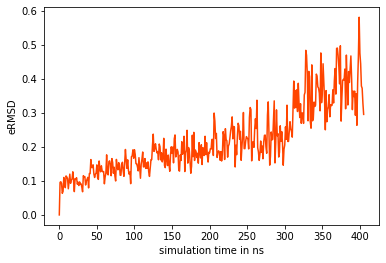

In [48]:
import matplotlib.pyplot as plt
eRMSD=[]
with open('Postprocess_equi_properties', 'r') as f:
        for count,line in enumerate(f):
            if count > 0:
                nums=line.split()
                eRMSD.append(float(nums[1]))
plt.ylabel('eRMSD')
plt.xlabel('simulation time in ns')
plt.plot(eRMSD, color='orangered')

In [49]:
#Compare base pairing of reference structure to the pairing over time during equilibration
#get pdb of the last frame of the equilibration

In [50]:
import barnaba as bb

structures=['reference.pdb','reference_equi.pdb']
for s in structures:
    # annotate
    pdb = s
    stackings, pairings, res = bb.annotate(pdb)

    # list base pairings
    print("BASE-PAIRS")
    for p in range(len(pairings[0][0])):
        res1 = res[pairings[0][0][p][0]]
        res2 = res[pairings[0][0][p][1]]
        interaction =  pairings[0][1][p]
        print("%10s %10s %4s" % (res1,res2,interaction))

    # list base-stackings
    print()
    print("STACKING")
    for p in range(len(stackings[0][0])):
        res1 = res[stackings[0][0][p][0]]
        res2 = res[stackings[0][0][p][1]]
        interaction =  stackings[0][1][p]
        print("%10s %10s %4s" % (res1,res2,interaction))

# Loading reference.pdb 


BASE-PAIRS

STACKING
     G_1_0      A_2_0   >>
     A_2_0      C_3_0   >>
     C_3_0      C_4_0   >>
BASE-PAIRS

STACKING
     G_1_0      A_2_0   >>
     A_2_0      C_3_0   >>
     C_3_0      C_4_0   >>


# Loading reference_equi.pdb 


In [51]:
#do not produce pdb
#%%bash -s $Sequence
#echo 0 | gmx_mpi trjconv -f equilib_all.xtc -s npt.tpr -n index.ndx  -o equilib_all.pdb 

<mdtraj.Trajectory with 406 frames, 12377 atoms, 3076 residues, and unitcells>


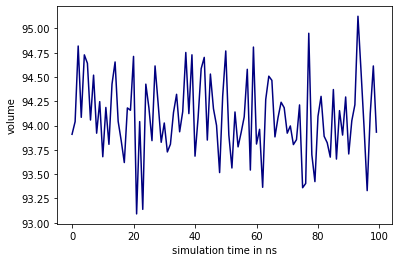

In [52]:
import mdtraj as mdt
import numpy as np
volume=[]
traj=mdt.load('equilib_all.xtc',top='npt.gro')
print(traj)
for elem in traj[-100:]:
    a=np.array(elem.unitcell_vectors)
    volume.append(np.linalg.det(a))
    #volume.append(elem.unitcell_volumes)
plt.ylabel('volume')
plt.xlabel('simulation time in ns')
plt.plot(volume, color='navy')

In [53]:
ave=np.average(volume)
print(ave)
index= np.abs(volume-ave).argmin() 
print(index)
volume[index]

94.09141
56


array([94.09023], dtype=float32)

In [54]:
true_index = traj.n_frames-100+index
traj[true_index].save('equilib_struct.gro')

In [55]:
#traj.n_frames
#traj[true_index]
#a=np.array(traj[true_index].unitcell_vectors)
#np.linalg.det(a)

In [56]:
#TREMD run
#write a .mdp for every replica with the correct temperature in it
#generate a .top and .tpr for every replica

In [57]:
#true number of replicas is nreplica+1
nreplica=23

In [58]:
%%bash -s $Sequence
cat > REMD_Setup.mdp << EOF
title                    = TREMD simulation $1
; RUN CONTROL PARAMETERS
integrator               = md
dt                       = 0.002                ; time step (in ps)
nsteps                   = 500000000               ; number of steps: 1000000 ps 1 ms
nstxout                  = 5000                      ; Save high precision coordinates every 10 ps
nstvout                  =                       ; Save velocities every ps
nstlog                   = 500                  ; Update log file at every step
nstenergy                = 500                  ; Write energies at every step
nstxtcout                = 500                  ; write every ps low precision coordinates
xtc_grps                 = System     ;group(s) to write to xtc trajectory
energygrps               = System       ; Write energy information separately for these groups

; NEIGHBORSEARCHING PARAMETERS
nstlist                  = 10                   ; Frequency to update the neighbor list. VALORE SUGGERITO DA MATTEO
ns-type                  = Grid
pbc                      = xyz
rlist                    = 1.0                  ; Cut-off distance for the short-range neighbor list. Solitam come rcoulomb e vdw type

; OPTIONS FOR ELECTROSTATICS AND VDW
cutoff-scheme            = Verlet
coulombtype              = PME
pme_order                = 4 ; cubic interpolation
fourierspacing           = 0.12 ; grid spacing for FFT
rcoulomb                 = 1.0                  ; 1.2 in paper jctc, Trang Nhu Do, 2014
vdw-type                 = Cut-off
rvdw                     = 1.0                  ; 1.2 in paper jctc, Trang Nhu Do, 2014

; Temperature coupling
tcoupl                   = V-rescale
tc-grps                  = RNA Water_and_ions
tau_t                    = 0.1      0.1
ref_t                    = 300      300

; Dispersion correction
DispCorr                 = EnerPres              ; account for vdw cut-off
; Pressure coupling
pcoupl                   = no     ; no pressure coupling in NVT

continuation             = yes
gen_vel                  = no    ; Assign velocities to particles by taking them randomly from a Maxwell distribution
gen_temp                 = 300   ; Temperature to generate corresponding Maxwell distribution
gen_seed                 = -1     ; Seed for (semi) random number generation. Different numbers give different sets of velocities

; OPTIONS FOR BONDS

constraint_algorithm     = lincs; holonomic constraints 
lincs_iter               = 1 ; accuracy of LINCS
lincs_order              = 4 ; also related to accuracy
constraints              = h-bonds
EOF

In [59]:
import numpy as np
topol=[]
with open('%s.top' %Sequence, 'r') as f:
        for line in f:
            topol.append(line)
mdp=[]
#copy the content of the setup MD.mdp and then generate all others
with open('REMD_Setup.mdp', 'r') as f:
        for line in f:
            mdp.append(line)
temperature = np.append(275,np.geomspace(278,400, nreplica))
print(len(temperature))
with open('temperature.dat', 'w+') as f:
    for index,t in enumerate(temperature):
        t= round(t, 3)
        f.write(str(index) + str(t))
for index,t in enumerate(temperature):
    t= round(t, 3)
    with open('EquiREMD%s.top' %index, 'w+') as f:
        for e,elem in enumerate(topol):
            f.write(topol[e])
    with open('topol%s.top' %index, 'w+') as f:
        for e,elem in enumerate(topol):
            f.write(topol[e])
    with open('REMD%s.mdp' %index, 'w+') as f:
        for e,elem in enumerate(mdp):
            if e==32 or e==41:
                newline=mdp[e].replace("300", str(t))
                f.write(newline) 
            else:
                f.write(mdp[e]) 

24


In [60]:
#Equilibration of all the replicas at their respective temperature

In [61]:
50000*0.002 # simulation time in ps 

100.0

In [62]:
%%bash -s $nreplica
for i in $(seq 0 $1)
do
    if [ "${i}" = "0" ]; then
        gmx_mpi grompp -f REMD${i}.mdp -c equilib_struct.gro -p topol${i}.top -o topol${i}.tpr -maxwarn 1
        gmx_mpi mdrun -v -s topol${i} -deffnm EquiREMD${i} -pin on -nsteps 50000  
    else
        j="$((${i}-1))"
        gmx_mpi grompp -f REMD${i}.mdp -c EquiREMD${j}.gro -t EquiREMD${j}.cpt -p topol${i}.top -o topol${i}.tpr -maxwarn 1 
        gmx_mpi mdrun -v -s topol${i} -deffnm EquiREMD${i} -pin on -nsteps 50000  
    fi
done

turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     4        RNA residues
There are:  3059      Water residues
There are:    13        Ion residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 275 K
Calculated rlist for 1x1 atom pair-list as 1.042 nm, buffer size 0.042 nm
Set rlist, assuming 4x4 atom pair-list, to 1.008 nm, buffer size 0.008 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 44x44x44, spacing 0.116 0.116 0.116
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
A

                      :-) GROMACS - gmx grompp, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [63]:
%%bash -s $nreplica
for i in $(seq 0 $1);
do
    echo Temperature |gmx_mpi energy -f EquiREMD${i}.edr -o EquiREMD${i}.xvg
done 


Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                 274.471       0.53    12.4482    2.66718  (K)

Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                 278.084       0.12    3.14018   0.749094  (K)

Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                 282.884       0.13    3.09304   0.166464  (K)

Sta

                      :-) GROMACS - gmx energy, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

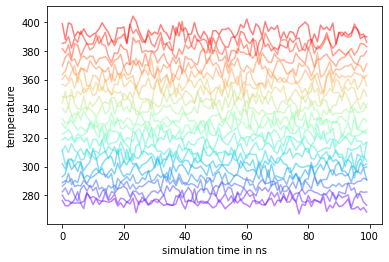

In [64]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
    
plt.ylabel('temperature')
plt.xlabel('simulation time in ns')
for i in range(nreplica):
    with open('EquiREMD%s.xvg' % i) as f:
        temperature=[]
        for count,line in enumerate(f):
              if count> 24:
                nums=line.split()
                temperature.append(float(nums[1]))
    colors = plt.cm.rainbow(np.linspace(0, 1, nreplica))
    plt.plot(temperature, color=colors[i], alpha=0.5)  
plt.show()

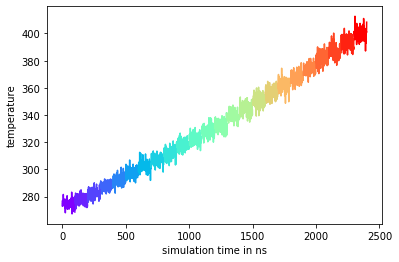

In [65]:
nreplica=24
temperature=[]
x=[]
counter=0
plt.ylabel('temperature')
plt.xlabel('simulation time in ns')
for i in range(nreplica):
    with open('EquiREMD%s.xvg' % i) as f:
        temperature_sub=[]
        x_sub=[]
        for count,line in enumerate(f):
            if count> 24:
                nums=line.split()
                temperature_sub.append(float(nums[1]))
                x_sub.append(counter)
                counter+=1
    temperature.append(temperature_sub)
    x.append(x_sub)
colors = cm.rainbow(np.linspace(0, 1, nreplica))
for i in range(nreplica):
    plt.plot(x[i],temperature[i], "-", color=colors[i])  
plt.show()

In [66]:
nreplica=23

In [67]:
%%bash -s $nreplica
for i in $(seq 0 $1);
do
    echo Potential | gmx_mpi energy -f EquiREMD${i}.edr -o EquiREMD${i}.xvg
done 


Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                   -170941         61    469.768   -208.871  (kJ/mol)

Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                   -170311         29    334.732    103.024  (kJ/mol)

Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                   -169387         43    354.993     209.09

                      :-) GROMACS - gmx energy, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

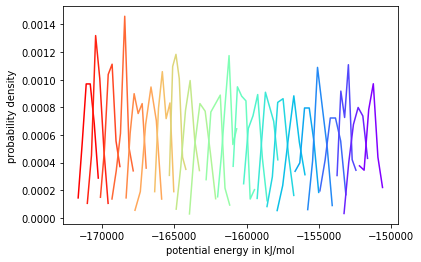

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import norm

potential=[]
colors = cm.rainbow_r(np.linspace(0, 1, nreplica))
plt.ylabel('probability density')
plt.xlabel('potential energy in kJ/mol')
for i in range(nreplica):
    with open('EquiREMD%s.xvg' % i) as f:
        potential_sub=[]
        for count,line in enumerate(f):
              if count> 24:
                    nums=line.split()
                    potential_sub.append(float(nums[1]))
    potential.append(potential_sub)
    #in x an average between two consecutive edges is calculated
    x=(np.histogram(potential[i],bins=6, density=True)[1][:-1]+np.histogram(potential[i],bins=6, density=True)[1][1:])/2
    y=np.histogram(potential[i],bins=6, density=True)[0]
    plt.plot(x,y, color=colors[i])                      

In [69]:
hist, bin_edges=np.histogram(potential[i],bins=6, density=True)
np.sum(hist * np.diff(bin_edges))

1.0

In [70]:
%%bash -s $Sequence
cat > plumed_postprocess_EquiREMD.dat << EOF
# vim:ft=plumed
MOLINFO STRUCTURE=reference.pdb
#
n: GROUP ATOMS=@nucleic
h: GROUP ATOMS=@hydrogens
nnh: GROUP ATOMS=n REMOVE=h

# ordered triplets of atoms on the 6-membered ring of nucleobases
# namely:
#  C2/C4/C6 for pyrimidines
#  C2/C6/C4 for purines

eRMSD1: ERMSD REFERENCE=reference.pdb ATOMS=@lcs-1,@lcs-2,@lcs-3,@lcs-4
PRINT ARG=eRMSD1 FILE=Postprocess_equiREMD_properties STRIDE=1000
EOF

In [71]:
%%bash -s $Sequence
plumed driver --plumed plumed_postprocess_EquiREMD.dat --ixtc EquiREMD0.xtc --trajectory-stride 1000 --timestep 0.002

PLUMED: PLUMED is starting
PLUMED: Version: 2.5s0 (git: 482e99d) compiled on Feb  7 2019 at 16:10:24
PLUMED: Please cite this paper when using PLUMED [1]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /u/b/bussi/software/plumed-2.5s0/lib/plumed
PLUMED: For installed feature, see /u/b/bussi/software/plumed-2.5s0/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 12377
PLUMED: File suffix: 
PLUMED: FILE: plumed_postprocess_EquiREMD.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named reference.pdb contains 1 chains 
PLUMED:   chain named A contains residues 1 to 3076 and atoms 1 to 12377 
PLUMED: Action GROUP
PLUMED:   with label n
PLUMED:   list of atoms:
PLUMED:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
PLUMED:  26 27 28 29 30 31

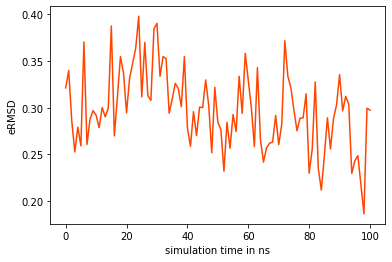

In [72]:
import matplotlib.pyplot as plt
eRMSD=[]
with open('Postprocess_equiREMD_properties', 'r') as f:
        for count,line in enumerate(f):
            if count > 0:
                nums=line.split()
                eRMSD.append(float(nums[1]))
plt.ylabel('eRMSD')
plt.xlabel('simulation time in ns')
plt.plot(eRMSD, color='orangered')

In [73]:
print('simulation time in ps:')
20*2500*0.002

simulation time in ps:


100.0

In [74]:
%%bash -s $nreplica
for i in $(seq 0 $1);
do
    #echo $i
    gmx_mpi grompp -f REMD${i}.mdp -c EquiREMD${i}.gro -t EquiREMD${i}.cpt -p topol${i}.top -o topol${i}.tpr 
done

turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     4        RNA residues
There are:  3059      Water residues
There are:    13        Ion residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 275 K
Calculated rlist for 1x1 atom pair-list as 1.042 nm, buffer size 0.042 nm
Set rlist, assuming 4x4 atom pair-list, to 1.008 nm, buffer size 0.008 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 44x44x44, spacing 0.116 0.116 0.116
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
A

                      :-) GROMACS - gmx grompp, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [75]:
#TREMD productions run

In [76]:
#how to read tpr files:
#%%bash 
#gmx_mpi dump -s topol0.tpr | more

In [77]:
%%bash
cat > plumed.dat << EOF
# vim:ft=plumed
MOLINFO STRUCTURE=reference.pdb
#
n: GROUP ATOMS=@nucleic
h: GROUP ATOMS=@hydrogens
nnh: GROUP ATOMS=n REMOVE=h

#Rg: GYRATION TYPE=RADIUS ATOMS=nnh
#PRINT ARG=Rg FILE=colvar STRIDE=1

eRMSD1: ERMSD REFERENCE=reference.pdb ATOMS=@lcs-1,@lcs-2,@lcs-3,@lcs-4
PRINT ARG=eRMSD1 FILE=eRMSD STRIDE=1000
EOF

In [78]:
#Benchmarking
#find ideal settings given the following guidelines:
#nnodes * nprocesses = nreplicas
#ntomp * nprocesses <= ppn

In [3]:
nreplica=24

In [80]:
# %%bash -s $nreplica
# cat > ProdRun.sh << EOF

# #!/bin/bash

# #PBS -q regular
# #PBS -l nodes=$1:ppn=20
# #PBS -l walltime=12:00:00

# module use /u/b/bussi/software/modules
# module load gromacs/2018.5s
# module load plumed/2.5s0

# mpirun -np 48 gmx_mpi mdrun -s topol -plumed plumed.dat -replex 100 -multi $1 
# EOF

In [81]:
#500000 steps = 1 ns
#500000*0.002 / 1000

In [82]:
%%bash -s $nreplica
foo='"$PBS_O_WORKDIR"'
cat > ProdRun.sh << EOF
#!/bin/sh
#SBATCH --partition=regular1
#SBATCH --time=12:00:00
#SBATCH --nodes=12
#SBATCH --ntasks-per-node=20

cd $foo

module purge
module use /home/bussi/modules/modulefiles
module use /home/mbernett/modules/modulefiles
module load gromacs/2018.4_plumed_febeta
module load plumed/2.5_febeta

mpirun -npernode 2 gmx_mpi mdrun -s topol -plumed plumed.dat -replex 40 -multi $1 -nsteps 500000 -ntomp 10 -pin on -maxh 11.5

EOF

In [83]:
#copy and run on cluster

In [84]:
%%bash -s $Sequence

scp -r plumed.dat tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1
scp -r ProdRun.sh tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1
scp -r topol* tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1
scp -r reference.pdb tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1

In [85]:
#copy from cluster for analysis

In [86]:
%%bash -s $Sequence
scp -r tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1/traj_comp* .
scp -r tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1/ener* .
scp -r tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1/md* .
scp -r tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1/eRMSD* .

In [87]:
import numpy as np
read_performance=False
keyword="ns/day"

fin = open('md0.log', 'r')
for line in fin:
    #print(line)
    if read_performance==True:
            nums=line.split()
            print(nums[1])
            break
    if  keyword in line:
            read_performance=True
        
fin.close()

65.814


In [88]:
#Build a table of performance, given number of nodes and processes

In [89]:
%%bash 
grep -A2 "Repl  average probabilities:" md0.log 
#grep -A2 "Repl  average probabilities:" md0_40.log 
#grep -A2 "Repl  average probabilities:" md0_200.log 

Repl  average probabilities:
Repl     0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23
Repl      .24  .08  .08  .08  .08  .08  .10  .09  .10  .10  .10  .11  .11  .11  .13  .12  .13  .12  .12  .13  .14  .13  .15


In [90]:
%%bash 
echo 0.002 | perl ../demux.pl md0.log

-----------------------------------------------------------------
Going to read a file containing the exchange information from
your mdrun log file (md0.log).
This will produce a file (replica_index.xvg) suitable for
demultiplexing your trajectories using trjcat,
as well as a replica temperature file (replica_temp.xvg).
Each entry in the log file will be copied 0 times.
-----------------------------------------------------------------
Time step of the simulation (ps)? There are 24 replicas.
Finished writing replica_index.xvg and replica_temp.xvg with 12500 lines


In [91]:
data=np.loadtxt('replica_index.xvg')
data=data.T[1:25]
data.shape

(24, 12500)

In [92]:
#data=[[1,23,0,1,0,0,2,3,4,5,6,8,3,3,5,6,1,2,0,0,0,1,0,4,5,6,23,0,1,0]]
lower_index=0
upper_index=nreplica-1
roundtrips=[]
RTT=[]
RTT_per_replica=[]
for row in data:
    for index,elem in enumerate(row):
        if index==0:
            start_i=elem
            counter=0
            visited_highest=False
            visited_lowest=False
            RTT_counter=0
            RTT_ave=np.mean(np.array(RTT))
            if np.isnan(RTT_ave):
                RTT_per_replica.append(0.0)
            else:
                RTT_per_replica.append(RTT_ave)
            RTT=[]
        if elem==lower_index:
            visited_lowest=True
        if elem==upper_index:
            visited_highest=True
        if elem==start_i and visited_highest==True and visited_lowest==True:
            counter+=1
            visited_highest=False
            visited_lowest=False
            RTT.append(RTT_counter)
            RTT_counter=0
        RTT_counter+=40*0.002#200*0.002 #40*0.002  
    roundtrips.append(counter)
RTT_ave=np.mean(np.array(RTT))
if np.isnan(RTT_ave):
    RTT_per_replica.append(0.0)
else:
    RTT_per_replica.append(RTT_ave)

print(roundtrips)
average_roundtrips=np.mean(np.array(roundtrips))
std_roundtrips=np.std(np.array(roundtrips))
print('Average roundtrip number= ', average_roundtrips, ' +-', std_roundtrips)
print('Average roundtrip number/ns= ', average_roundtrips/1, ' +-', std_roundtrips/1)

#print(RTT_per_replica)
average_RTT=np.mean(np.array(RTT_per_replica))
std_RTT=np.std(np.array(RTT_per_replica))
print('Average roundtrip time= ', average_RTT, ' +-', std_RTT , 'in ps')

#np.sum(np.array(roundtrips))

/u/t/tfrahlki/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/u/t/tfrahlki/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
Average roundtrip number=  0.20833333333333334  +- 0.4061164310337068
Average roundtrip number/ns=  0.20833333333333334  +- 0.4061164310337068
Average roundtrip time=  123.49120000000937  +- 261.67755560340646 in ps


In [93]:
#plot for comparison in case one wants to try longer replex times
# import matplotlib.pyplot as plt
# replex_time=[40*0.002,200*0.002]
# roundtrips_per_ns=[1.325, 0.5583333333333333 ]
# std=[0.9465947742654544 , 0.25806437612003374]
# plt.xlabel('replex time in ps')
# plt.ylabel('roundtrips per ns')
# # zip joins x and y coordinates in pairs
# for x,y in zip(replex_time,roundtrips_per_ns):

#     label = "{:.2f}".format(y)

#     plt.annotate(label, # this is the text
#                  (x,y), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center

# plt.errorbar(replex_time,roundtrips_per_ns, std, linestyle='None', marker='^')

In [94]:
#Full simulation with best settings regarding nodes, processes and threads
#make a directory for hills and cpt backups on the cluster

In [4]:
%%bash -s $nreplica
foo='"$SLURM_SUBMIT_DIR"'
cat > ProdRun1.sh << EOF
#!/bin/sh
#SBATCH --partition=regular2
#SBATCH --time=12:00:00
#SBATCH --nodes=12
#SBATCH --ntasks-per-node=20

cd $foo

module purge
module use /home/bussi/modules/modulefiles
module use /home/mbernett/modules/modulefiles
module load gromacs/2018.4_plumed_febeta
module load plumed/2.5_febeta

mpirun -npernode 2 gmx_mpi mdrun -s topol -plumed plumed.dat -nsteps 5000000 -replex 40 -multi $1 -ntomp 10 -pin on 

mkdir backup_cpt
mkdir backup_eRMSD
mkdir backup_cpt/1
cp state** backup_cpt/1
mkdir backup_eRMSD/1
cp eRMSD** backup_eRMSD/1

EOF

In [5]:
%%bash 
foo='`squeue -u tfrahlki | awk'
foo1='| sort -n | tail -n 1`'
foo2='$(eval echo "{$runN_begin..$runN_end}")'
foo3='afterok:${jobID} ProdRun${runN}.sh'
foo4='"Chained ProdRun${runN}.sh to jobID ${jobID}!"'
foo5='${jobID}'
bar='$1'
foo6="'{print $bar}'"
cat > chain_jobs_febeta.sh << EOF
#!/bin/bash

echo
read -p "INDEX of the first PBS/SBATCH file to chain? " runN_begin
read -p "Now INDEX of the last PBS/SBATCH file to chain? " runN_end
read -p "jobID from which to start chaining? " jobID
echo

for runN in $foo2
do

sbatch -d $foo3

echo $foo4

jobID=$foo $foo6 $foo1

echo "Current jobID is: $foo5"

done

EOF

In [6]:
%%bash -s $nreplica

foo='"$SLURM_SUBMIT_DIR"'
for i in $(seq 2 100);
do
cat > ProdRun${i}.sh << EOF
#!/bin/sh
#SBATCH --partition=regular2
#SBATCH --time=12:00:00
#SBATCH --nodes=12
#SBATCH --ntasks-per-node=20

cd $foo

module purge
module use /home/bussi/modules/modulefiles
module use /home/mbernett/modules/modulefiles
module load gromacs/2018.4_plumed_febeta
module load plumed/2.5_febeta

mpirun -npernode 2 gmx_mpi mdrun -cpi state -plumed plumed.dat -nsteps 5000000 -noappend -replex 40 -multi $1 -ntomp 10 -hrex -pin on 

mkdir backup_cpt/$i
cp state** backup_cpt/$i
mkdir backup_eRMSD/$i
cp eRMSD** backup_eRMSD/$i

EOF
done

In [7]:
%%bash -s $Sequence

scp -r ProdRun1.sh tfrahlki@frontend2.hpc.sissa.it:/scratch/tfrahlki/FFCorrections/Simulations/TREMD/$1 
for i in $(seq 2 100); 
do 
    scp -r ProdRun${i}.sh tfrahlki@frontend2.hpc.sissa.it:/scratch/tfrahlki/FFCorrections/Simulations/TREMD/$1 
done
scp -r plumed.dat tfrahlki@frontend2.hpc.sissa.it:/scratch/tfrahlki/FFCorrections/Simulations/TREMD/$1 
scp -r reference.pdb tfrahlki@frontend2.hpc.sissa.it:/scratch/tfrahlki/FFCorrections/Simulations/TREMD/$1
scp -r topol* tfrahlki@frontend2.hpc.sissa.it:/scratch/tfrahlki/FFCorrections/Simulations/TREMD/$1
scp -r chain_jobs_febeta.sh tfrahlki@frontend2.hpc.sissa.it:/scratch/tfrahlki/FFCorrections/Simulations/TREMD/$1 

In [ ]:
#saving the .xtc trajectories in the srnas directory, in order to save diskspace on the cluster

In [ ]:
%%bash -s $Sequence
rsync -bavz tfrahlki@frontend2.hpc.sissa.it:/scratch/tfrahlki/FFCorrections/Simulations/TREMD/$1  /net/sbp/srnas2/tfrahlki/Simulations/$2_TREMD

In [ ]:
#%%bash -s $Sequence
#rm tfrahlki@frontend2.hpc.sissa.it:/scratch/tfrahlki/FFCorrections/Simulations/TREMD/$1/*.xtc

In [10]:
# %%bash -s $Sequence

# scp -r ProdRun1.sh tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1 
# for i in $(seq 2 35); 
# do 
#     scp -r ProdRun${i}.sh tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1 
# done
# scp -r plumed.dat tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1 
# scp -r reference.pdb tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1
# scp -r topol* tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1
# scp -r chain_jobs_febeta.sh tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1 

In [ ]:
#extending simulations (from 15 jobs uploaded so far to 35, because i need 15 days and cluster time is 12 hours)

In [4]:
%%bash -s $nreplica

foo='"$SLURM_SUBMIT_DIR"'
for i in $(seq 16 35);
do
cat > ProdRun${i}.sh << EOF
#!/bin/sh
#SBATCH --partition=regular2
#SBATCH --time=12:00:00
#SBATCH --nodes=12
#SBATCH --ntasks-per-node=20

cd $foo

module purge
module use /home/bussi/modules/modulefiles
module use /home/mbernett/modules/modulefiles
module load gromacs/2018.4_plumed_febeta
module load plumed/2.5_febeta

mpirun -npernode 2 gmx_mpi mdrun -cpi state -plumed plumed.dat -noappend -replex 40 -multi $1 -ntomp 10 -hrex -pin on -maxh 11.5

mkdir backup_cpt/$i
cp state**.cpt backup_cpt/$i
cp state**_prev.cpt backup_cpt/$i
mkdir backup_HILLS/$i
cp HILLS** backup_HILLS/$i

EOF
done

In [5]:
%%bash -s $Sequence
for i in $(seq 16 35); 
do 
    scp -r ProdRun${i}.sh tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1 
done

In [ ]:
%%bash -s $Sequence
scp -r tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1/traj_comp* .
scp -r tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1/ener* .
scp -r tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1/md* .
scp -r tfrahlki@frontend2.hpc.sissa.it:/home/tfrahlki/FFCorrections/Simulations/TREMD/$1/eRMSD* .

In [ ]:
#combine all the partial files together into one (at least for the ground replica)

In [ ]:
%%bash 
for i in $(seq 0 23);
do
gmx_mpi trjcat -f traj_comp$i.xtc traj_comp$i.part0002.xtc traj_comp$i.part0003.xtc traj_comp$i.part0004.xtc traj_comp$i.part0005.xtc -o traj_comp${i}_full.xtc
gmx_mpi eneconv -f ener$i.edr ener$i.part0002.edr ener$i.part0003.edr ener$i.part0004.edr ener$i.part0005.edr -o ener${i}_full.edr
done

In [97]:
#Analysis TREMD

In [98]:
%%bash -s $Sequence
array=("topol0")
array2=("traj_comp0")
#array2=("traj_comp0_full")

for ((i=0;i<${#array[@]};++i));
do
tpr=${array[i]}.tpr
traj=${array2[i]}.xtc

gmx_mpi trjconv -s $tpr -f $traj -o 1_whole.xtc -pbc whole -n index.ndx <<EOF
0
EOF

gmx_mpi trjconv -s $tpr -f 1_whole.xtc -o 2_center.xtc -center -n index.ndx <<EOF
RNA
0
EOF
gmx_mpi trjconv -s $tpr -f 2_center.xtc -o ${array2[i]}'_proc.xtc' -pbc mol -n index.ndx -ur compact <<EOF
0
EOF
done

Select group for output
Selected 0: 'System'
Select group for centering
Selected 1: 'RNA'
Select group for output
Selected 0: 'System'
Select group for output
Selected 0: 'System'


                     :-) GROMACS - gmx trjconv, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [99]:
#dont produce pdbs on large systems/trajectories!!!!!
#%%bash -s $Sequence
#gmx_mpi trjconv -s topol0.tpr -f traj_comp0.xtc_proc.xtc -o TREMD_gReplica_Xns_centered.pdb -n index.ndx<<EOF
#1
#EOF

In [100]:
%%bash 
for i in $(seq 0 23);
do
    #echo Potential | gmx_mpi energy -f ener${i}_full.edr -o ener${i}_full.xvg
    echo Potential | gmx_mpi energy -f ener${i}.edr -o ener${i}.xvg
done 


Statistics over 500001 steps [ 0.0000 through 1000.0000 ps ], 1 data sets
All statistics are over 5001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                   -170935         21     372.27   -53.7636  (kJ/mol)

Statistics over 500001 steps [ 0.0000 through 1000.0000 ps ], 1 data sets
All statistics are over 5001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                   -170315         14    366.913    -70.681  (kJ/mol)

Statistics over 500001 steps [ 0.0000 through 1000.0000 ps ], 1 data sets
All statistics are over 5001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                   -169406        8.1    375.392  

                      :-) GROMACS - gmx energy, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

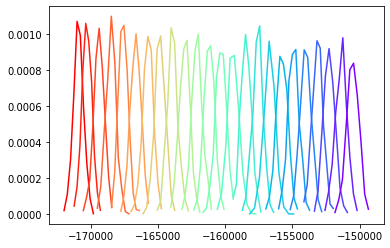

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import norm

potential=[]
colors = cm.rainbow_r(np.linspace(0, 1, nreplica))
#ax=plt.gca()
#cb=ax.contourf([[0,0],[0,0]],range(275,400,1),cmap='rainbow')
#cbar=plt.colorbar(cb)
#cbar.set_label('temperature in K')
#plt.ylabel('probability density')
#plt.xlabel('potential energy in kJ/mol $\cdot 10^3$')
#plt.ylim(0, 0.00125)
for i in range(nreplica):
    #with open('ener%s_full.xvg' % i) as f:
    with open('ener%s.xvg' % i) as f:
        potential_sub=[]
        for count,line in enumerate(f):
              if count> 23:
                    nums=line.split()
                    potential_sub.append(float(nums[1]))
    potential.append(potential_sub)
    x=(np.histogram(potential[i],bins=10, density=True)[1][1:]+np.histogram(potential[i],bins=10, density=True)[1][:-1])/2
    #x/=1000
    y=np.histogram(potential[i],bins=10, density=True)[0]
    plt.plot(x,y, color=colors[i]) 
plt.show()

In [102]:
hist, bin_edges=np.histogram(potential[i],bins=10, density=True)
np.sum(hist * np.diff(bin_edges))

0.9999999999999999

In [103]:
import numpy as np
read_performance=False
keyword="ns/day"

fin = open('md0.log', 'r')
for line in fin:
    #print(line)
    if read_performance==True:
            nums=line.split()
            print(nums[1])
            break
    if  keyword in line:
            read_performance=True
        
fin.close()

65.814


In [104]:
%%bash 
grep -A2 "Repl  average probabilities:" md0.log 
grep -A2 "Repl  average probabilities:" md0.part0002.log
grep -A2 "Repl  average probabilities:" md0.part0003.log
grep -A2 "Repl  average probabilities:" md0.part0004.log
grep -A2 "Repl  average probabilities:" md0.part0005.log

Repl  average probabilities:
Repl     0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23
Repl      .24  .08  .08  .08  .08  .08  .10  .09  .10  .10  .10  .11  .11  .11  .13  .12  .13  .12  .12  .13  .14  .13  .15


grep: md0.part0002.log: No such file or directory
grep: md0.part0003.log: No such file or directory
grep: md0.part0004.log: No such file or directory
grep: md0.part0005.log: No such file or directory


CalledProcessError: Command 'b'grep -A2 "Repl  average probabilities:" md0.log \ngrep -A2 "Repl  average probabilities:" md0.part0002.log\ngrep -A2 "Repl  average probabilities:" md0.part0003.log\ngrep -A2 "Repl  average probabilities:" md0.part0004.log\ngrep -A2 "Repl  average probabilities:" md0.part0005.log\n'' returned non-zero exit status 2.

In [105]:
#%%bash 
#grep "Repl ex" md0.log

In [106]:
#%%bash 
#demux.pl md0.log

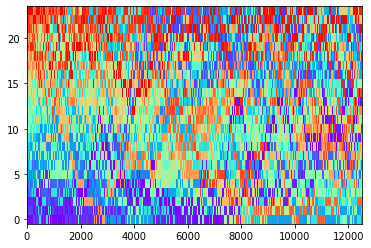

In [107]:
#this plot shows which index is where during the simulation
#and this is the relevant one, because i want to see the structures with different starting configurations mixing
#here the temperature in the column is constant
import pylab as pl
data=np.loadtxt('replica_index.xvg')
ax=pl.gca()
ax.imshow(data.T[1:25], origin='lower', interpolation='nearest', cmap='rainbow',aspect='auto')

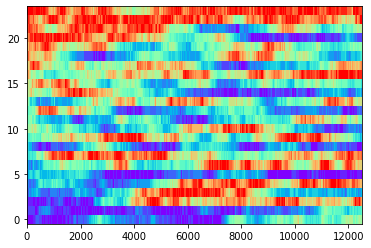

In [108]:
#here the index in the column is constant
#so column 0 always corresponds to replica starting at index 0 with ground temperature
#this shows from which temperature a replica is coming into another replicas timeline
#meaning even though the replica index is 5(highest) since it is joining from replica timeline 2 its current temperature is the one in the settings for replica 2
#so red in the ground replica means: replica with highest temperature is really exchanging into the ground replica directly
data=np.loadtxt('replica_temp.xvg')
ax=pl.gca()
ax.imshow(data.T[1:25], origin='lower', interpolation='nearest', cmap='rainbow',aspect='auto')

In [109]:
#%%bash 
#gmx_mpi  trjcat -f traj_comp?.xtc -demux replica_index.xvg

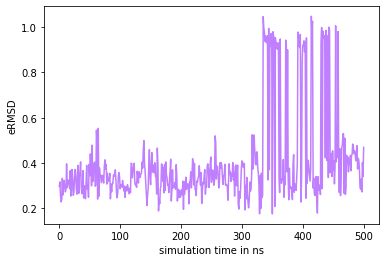

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
    
plt.ylabel('eRMSD')
plt.xlabel('simulation time in ns')
for i in range(6):
    if i==0:#or i==5:  #choose which files to plot
        with open('eRMSD.%s' % i) as f:
            eRMSD=[]
            for count,line in enumerate(f):
                  if count> 0:
                    nums=line.split()
                    eRMSD.append(float(nums[1]))
        colors = plt.cm.rainbow(np.linspace(0, 1, 6))
        plt.plot(eRMSD, color=colors[i], alpha=0.5)  
plt.show()

In [111]:
#checking if the reparameterization was implemented correctly, by looking at the differences in dihedral potentials
#before and after the reparameterization

In [112]:
%%bash 
#echo Proper-Dih. | gmx_mpi energy -f ener0_full.edr -o diherdral_ener0.xvg
echo Proper-Dih. | gmx_mpi energy -f ener0.edr -o diherdral_ener0.xvg


Statistics over 500001 steps [ 0.0000 through 1000.0000 ps ], 1 data sets
All statistics are over 5001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Proper Dih.                 395.962        1.3    15.5702    5.50819  (kJ/mol)


                      :-) GROMACS - gmx energy, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

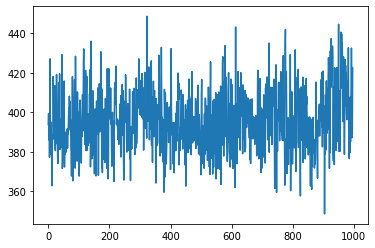

In [113]:
dihedral_energy=[]
with open('diherdral_ener0.xvg') as f:
    for count,line in enumerate(f):
              if count> 27:
                    nums=line.split()
                    dihedral_energy.append(float(nums[1]))
plt.plot(dihedral_energy)

In [114]:
%%bash 
#gmx_mpi mdrun -s topol0.tpr -rerun traj_comp0_full.xtc -e CheckEnergies.edr
gmx_mpi mdrun -s topol0.tpr -rerun traj_comp0.xtc -e CheckEnergies.edr

                      :-) GROMACS - gmx mdrun, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS dev

In [115]:
%%bash 
gmx_mpi energy -f CheckEnergies.edr -o diherdral_ener0.xvg<<EOF
Proper-Dih.
LJ-14
Total-Energy
EOF


Statistics over 500001 steps [ 0.0000 through 1000.0000 ps ], 3 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Proper Dih.                 396.022        1.2    15.5142    5.08585  (kJ/mol)
LJ-14                       163.999       0.48      10.38     2.1528  (kJ/mol)
Total Energy                -170912         24    489.385   -115.722  (kJ/mol)


                      :-) GROMACS - gmx energy, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

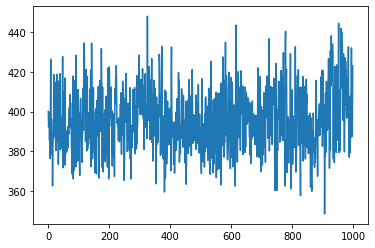

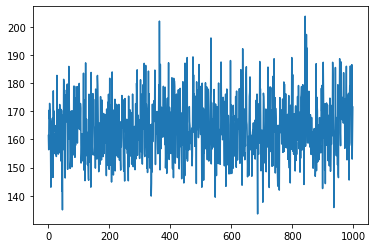

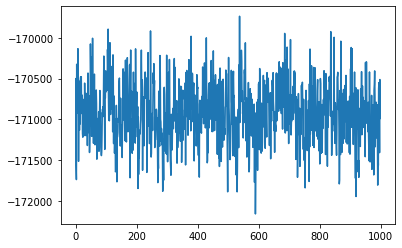

In [116]:
dihedral_energy=[]
LJ_energy=[]
total_energy=[]
with open('diherdral_ener0.xvg') as f:
    for count,line in enumerate(f):
              if count> 27:
                    nums=line.split()
                    dihedral_energy.append(float(nums[1]))
                    LJ_energy.append(float(nums[2]))
                    total_energy.append(float(nums[3]))
plt.plot(dihedral_energy)
plt.show()
plt.plot(LJ_energy)
plt.show()
plt.plot(total_energy)
plt.show()

In [117]:
#Check original forcefield and analyze the dihedral potentials there

In [118]:
%%bash -s $Sequence
mkdir CheckReparameterization
scp -r $1.top CheckReparameterization/CheckParam.top
scp -r REMD0.mdp CheckReparameterization/orig_ff.mdp
gmx_mpi trjconv -s topol0.tpr  -f traj_comp0_proc.xtc -e 0 -o CheckReparameterization/CheckParam.gro <<EOF
0
EOF

Select group for output
Selected 0: 'System'


                     :-) GROMACS - gmx trjconv, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [119]:
%%bash -s $Sequence
cd CheckReparameterization
scp -r /u/t/tfrahlki/Documents/Projects/DihedralCorrections/Simulations/Forcefields/ff-opc-water-model/amber_na.ff .
vi CheckParam.top -c '%s/OZ/OS' -c '%s/amber_na_opc_MODIFIED_VDW.ff/amber_na.ff' -c 'wq' 

7="CheckParam.top" 1300L, 40467C

6 substitutions on 6 lines

3 substitutions on 3 lines

"CheckParam.top" 1300L, 40416C written

>8

Vim: Warning: Output is not to a terminal
Vim: Warning: Input is not from a terminal


In [120]:
%%bash 
cd CheckReparameterization
gmx_mpi grompp -f orig_ff.mdp -c CheckParam.gro -p CheckParam.top -o orig_ff.tpr

turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     4        RNA residues
There are:  3059      Water residues
There are:    13        Ion residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 275 K
Calculated rlist for 1x1 atom pair-list as 1.042 nm, buffer size 0.042 nm
Set rlist, assuming 4x4 atom pair-list, to 1.008 nm, buffer size 0.008 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 44x44x44, spacing 0.116 0.116 0.116


                      :-) GROMACS - gmx grompp, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [121]:
%%bash 
#scp -r traj_comp0_full.xtc CheckReparameterization/traj_comp0_full.xtc
scp -r traj_comp0.xtc CheckReparameterization/traj_comp0.xtc
cd CheckReparameterization
#gmx_mpi mdrun -s orig_ff.tpr -rerun traj_comp0_full.xtc -e CheckEnergies_orig.edr
gmx_mpi mdrun -s orig_ff.tpr -rerun traj_comp0.xtc -e CheckEnergies_orig.edr

                      :-) GROMACS - gmx mdrun, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS dev

In [122]:
%%bash 
cd CheckReparameterization
gmx_mpi energy -f CheckEnergies_orig.edr -o diherdral_ener0.xvg<<EOF
Proper-Dih.
LJ-14
Total-Energy
EOF


Statistics over 500001 steps [ 0.0000 through 1000.0000 ps ], 3 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Proper Dih.                 396.022        1.2    15.5142    5.08585  (kJ/mol)
LJ-14                       149.651       0.42    9.47771   0.978872  (kJ/mol)
Total Energy                -170977         16    372.853   -53.9554  (kJ/mol)


                      :-) GROMACS - gmx energy, 2018.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

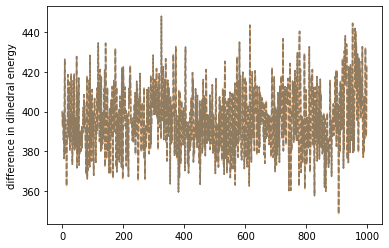

should be identical


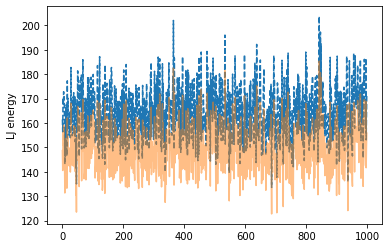

should be different


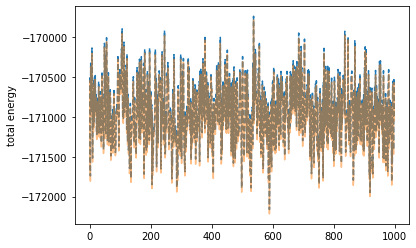

should be different


In [123]:
import matplotlib.pyplot as plt
dihedral_energy=[]
LJ_energy=[]
total_energy=[]
dihedral_energy_old=[]
LJ_energy_old=[]
total_energy_old=[]
with open('diherdral_ener0.xvg') as f:
    for count,line in enumerate(f):
              if count> 27:
                    nums=line.split()
                    dihedral_energy.append(float(nums[1]))
                    LJ_energy.append(float(nums[2]))
                    total_energy.append(float(nums[3]))
dihedral_energy_old=[]
with open('/u/t/tfrahlki/Documents/Projects/DihedralCorrections/Simulations/Project_ff_learning/%s_TREMD/CheckReparameterization/diherdral_ener0.xvg' % Sequence) as f:
    for count,line in enumerate(f):
              if count> 27:
                    nums=line.split()
                    dihedral_energy_old.append(float(nums[1]))
                    LJ_energy_old.append(float(nums[2]))
                    total_energy_old.append(float(nums[3]))
plt.figure(0)
plt.ylabel('difference in dihedral energy')
plt.plot(dihedral_energy, '--', alpha=1)
plt.plot(dihedral_energy_old, alpha=0.5)
plt.show()
print('should be identical')
plt.figure(1)
plt.ylabel('LJ energy')
plt.plot(LJ_energy, '--', alpha=1)
plt.plot(LJ_energy_old, alpha=0.5)
plt.show()
print('should be different')
plt.figure(2)
plt.ylabel('total energy')
#plt.xlim(900,1000)
plt.plot(total_energy, '--', alpha=1)
plt.plot(total_energy_old, alpha=0.5)
plt.show()
print('should be different')

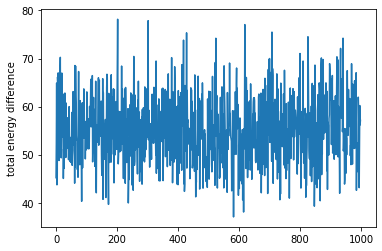

should be fluctuating around an average difference


In [124]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(5)
plt.ylabel('total energy difference')
plt.plot(np.array(total_energy)-np.array(total_energy_old))
plt.show()
print('should be fluctuating around an average difference')